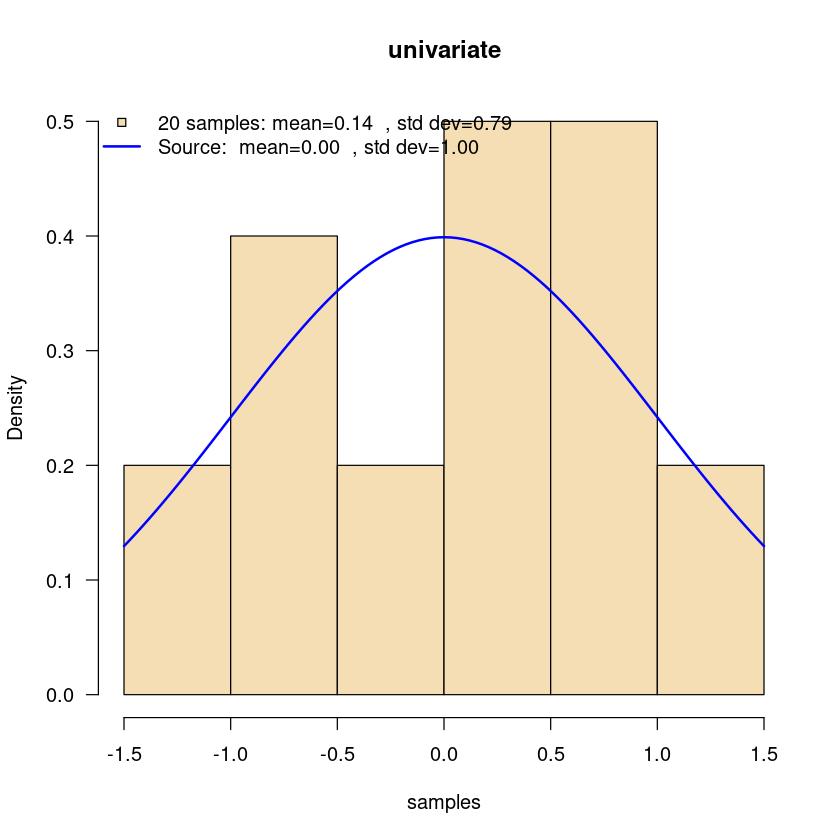

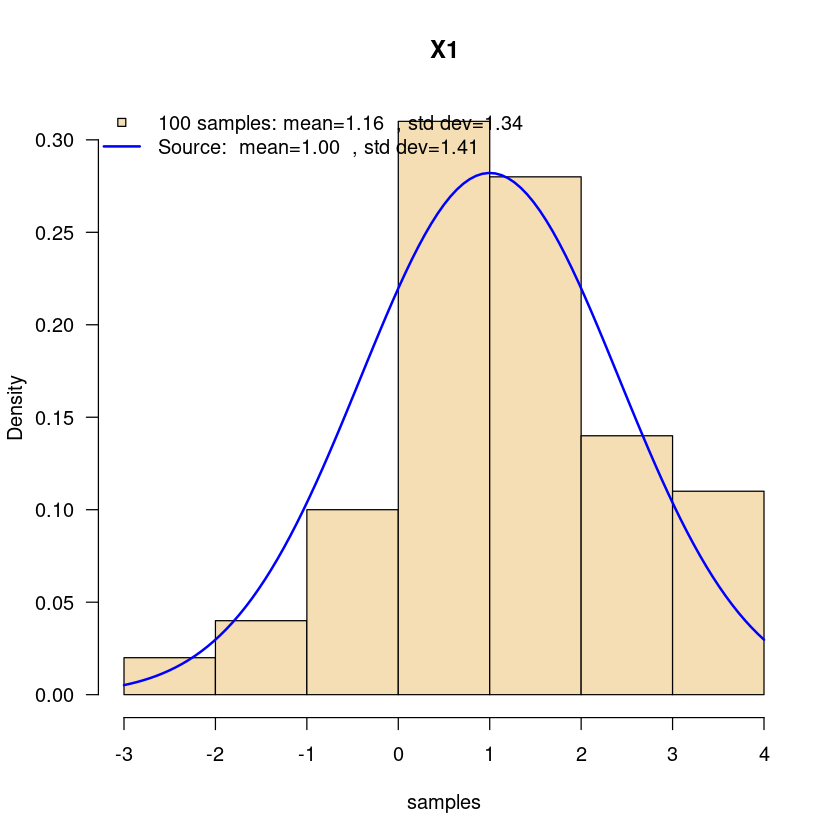

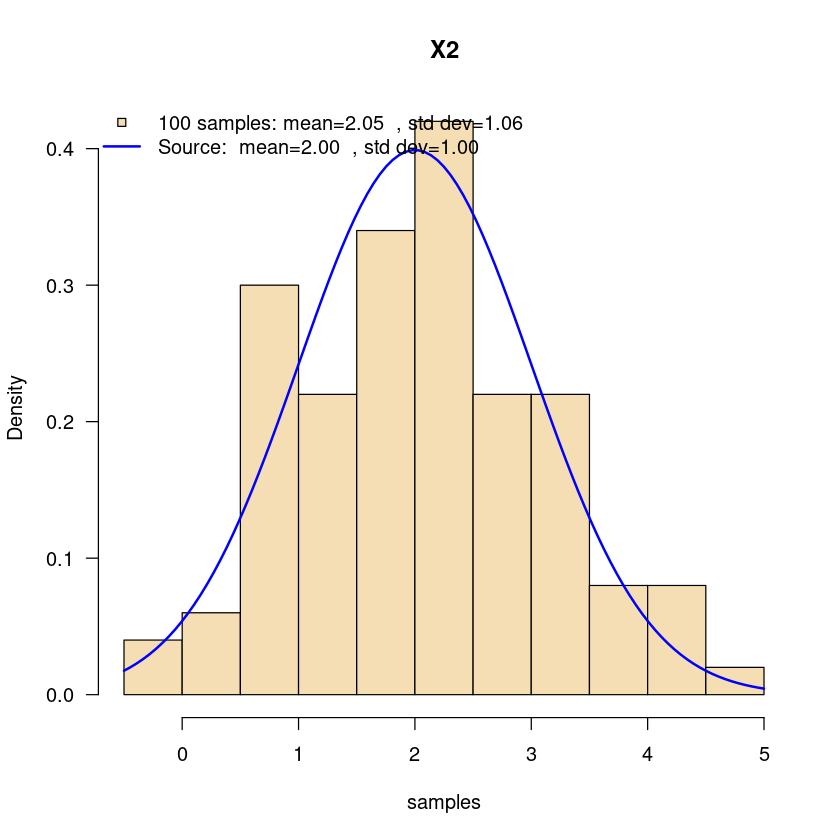

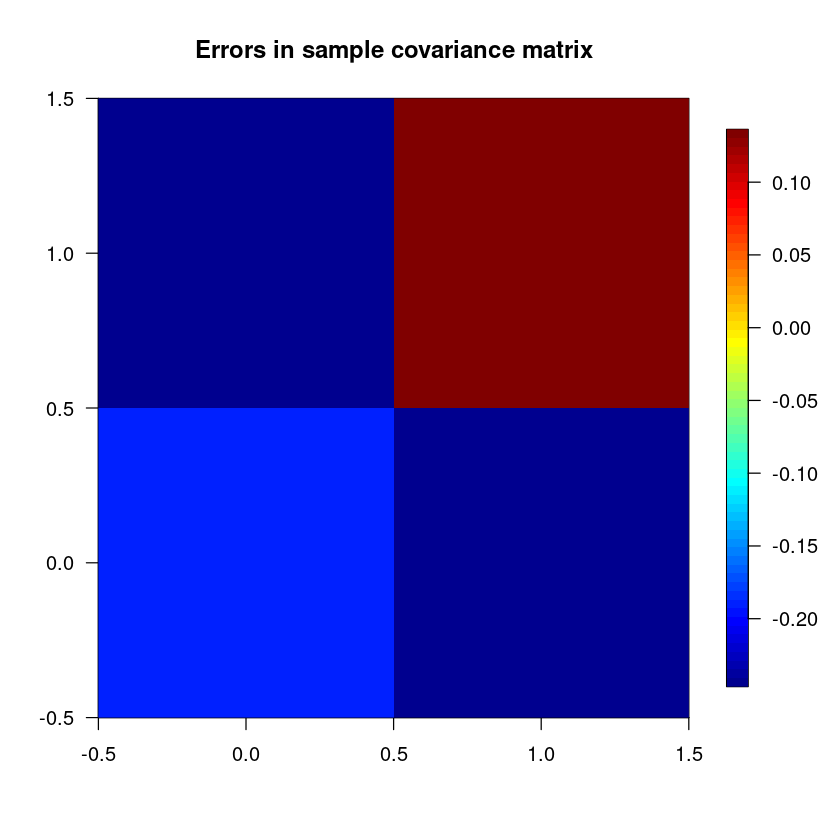

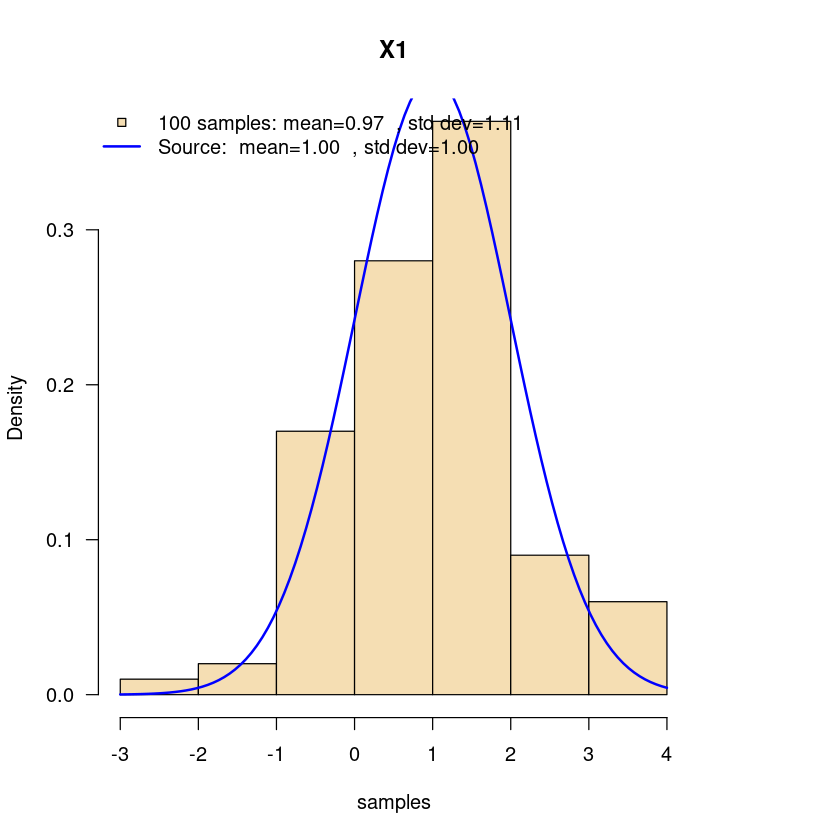

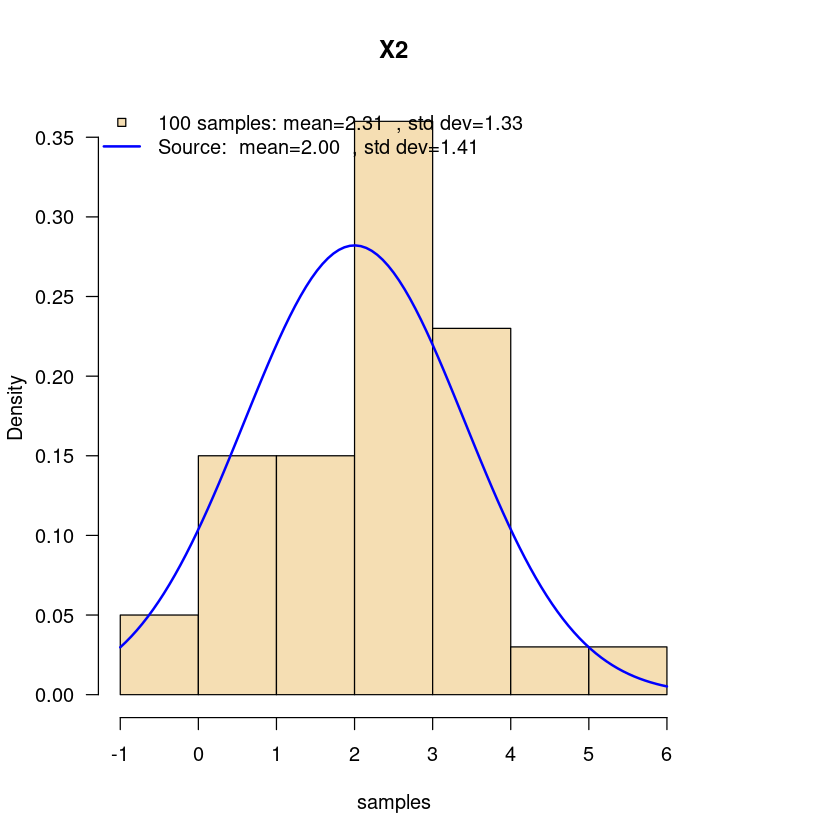

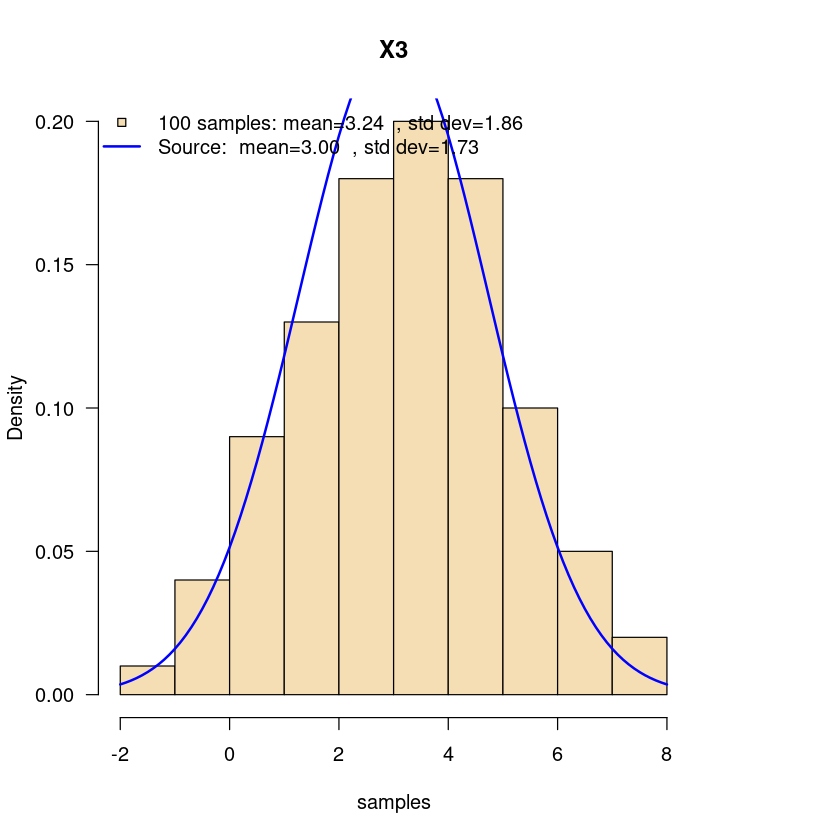

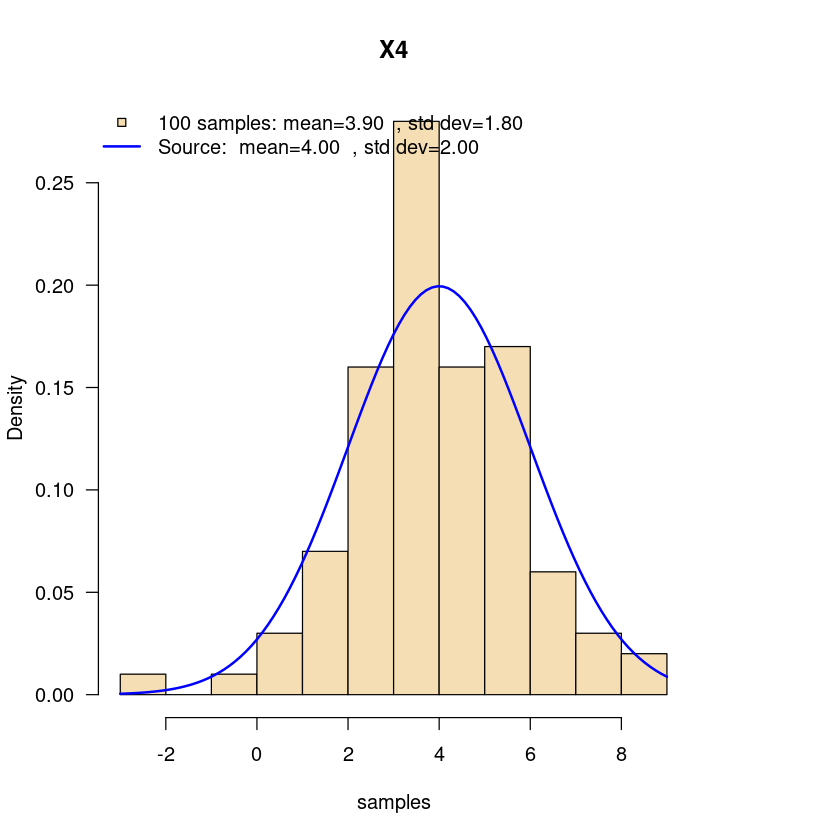

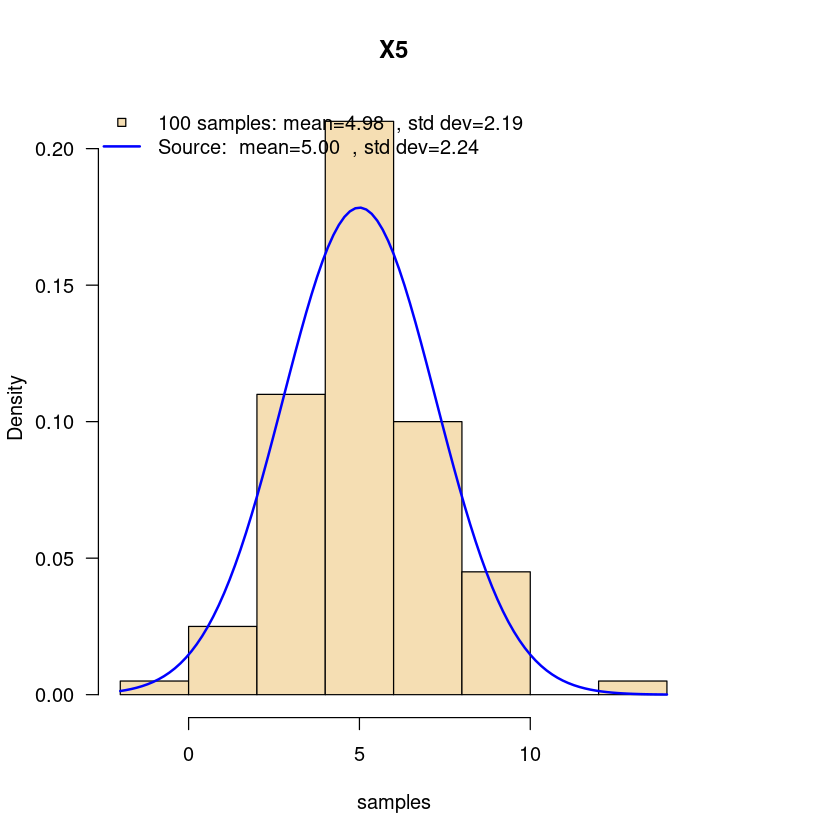

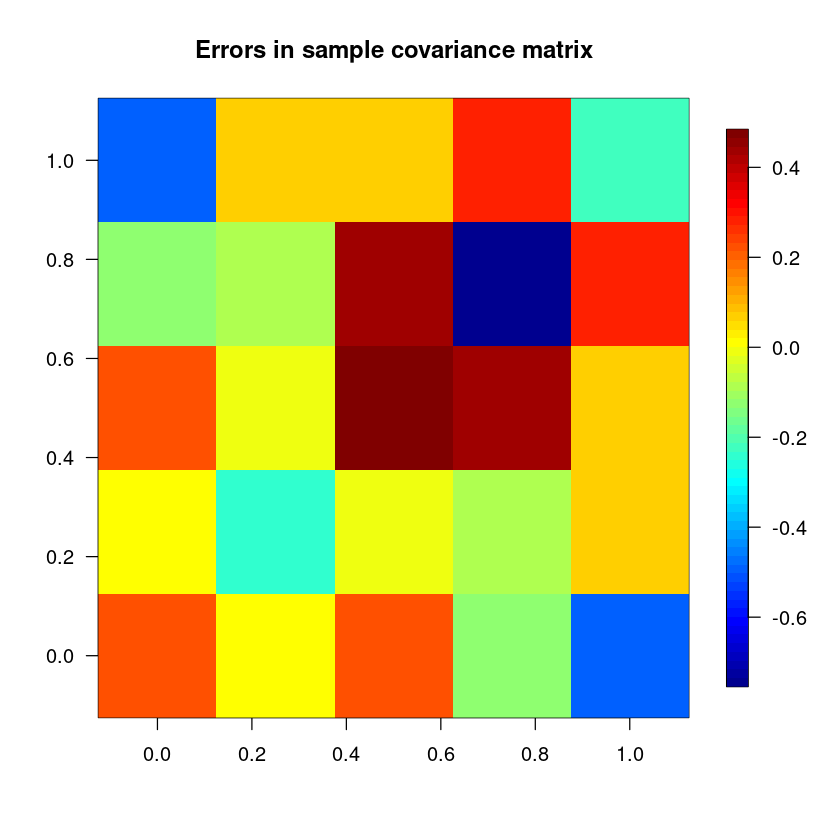

In [7]:
library(fields)
source("../tools/enkf.r") # for generate_ensemble() function

plot_panel <- function(mn,std,samples,title) {
    # This function expects univariate information
    par(las=1)
    hist(samples,freq=FALSE,col='wheat',main=title)
    curve(dnorm(x, mn, std),add=TRUE,col='blue',lwd=2)
    legend(x='topleft',bty='n',
           legend=c(sprintf("%d samples: mean=%-6.2f, std dev=%-6.2f",length(samples),mean(samples),sd(samples)),
                  sprintf("Source:  mean=%-6.2f, std dev=%-6.2f",mn,std)),
           lty=c(NA,1),col=c('black','blue'),
           pt.bg=c('wheat',NA),pch=c(22,NA),lwd=c(1,2))
}


# First, see how many samples are needed for a simple Gaussian PDF

x <- 0
Sx <- matrix(1,nrow=1,ncol=1)

nmemb <- 20
samples <- generate_ensemble(x=x,Sx=Sx,nmemb=nmemb)
plot_panel(mn=x,std=sqrt(Sx),samples=samples,title='univariate')



# Now, a bivariate normal


x <- matrix(c(1,2),nrow=2)
Sx <- matrix(c(2,0,0,1),nrow=2,ncol=2)

nmemb <- 100
samples <- generate_ensemble(x=x,Sx=Sx,nmemb=nmemb)

# layout(matrix(1:3,nrow=3)) # not good for notebooks
plot_panel(mn=x[1,1],std=sqrt(Sx[1,1]),samples=samples[,1],title="X1")
plot_panel(mn=x[2,1],std=sqrt(Sx[2,2]),samples=samples[,2],title="X2")

imagePlot(cov(samples)-Sx,main="Errors in sample covariance matrix")


# Finally multivariate (5) normal


x <- matrix(1:5,nrow=5)
Sx <- matrix(0,nrow=5,ncol=5)
diag(Sx) <- 1:5

nmemb <- 100
samples <- generate_ensemble(x=x,Sx=Sx,nmemb=nmemb)

#layout(matrix(1:6,nrow=6)) # not good for notebooks
plot_panel(mn=x[1,1],std=sqrt(Sx[1,1]),samples=samples[,1],title="X1")
plot_panel(mn=x[2,1],std=sqrt(Sx[2,2]),samples=samples[,2],title="X2")
plot_panel(mn=x[3,1],std=sqrt(Sx[3,3]),samples=samples[,3],title="X3")
plot_panel(mn=x[4,1],std=sqrt(Sx[4,4]),samples=samples[,4],title="X4")
plot_panel(mn=x[5,1],std=sqrt(Sx[5,5]),samples=samples[,5],title="X5")

imagePlot(cov(samples)-Sx,main="Errors in sample covariance matrix")



